In [137]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-data-compressed/bank_data_compressed.csv


In [138]:
dt=pd.read_csv('/kaggle/input/bank-data-compressed/bank_data_compressed.csv')

### The features in the dataset

step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig:customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrg: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recepient before the transaction

newbalanceDest: the new balance of the receipient after the transaction

isFraud: fraud transaction

In [139]:
dt.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [140]:
dt.drop('isFlaggedFraud',inplace=True,axis=1)

In [141]:
dt.columns= ["step", "type", "amount", "customer_starting_transaction", "bal_before_transaction", 
            "bal_after_transaction", "recipient_of_transaction", "bal_of_recepient_before_transaction", "bal_of_receipient_after_transaction", "fraud_transaction"]

# data analysis and preprocessing

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
dt.describe().astype(int)

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
count,4999,4999,4999,4999,4999,4999,4999
mean,1,101527,1041750,1063559,918403,1065524,0
std,1,300991,2301463,2343265,2542430,2924090,0
min,1,6,0,0,0,0,0
25%,1,3734,570,0,0,0,0
50%,1,10951,26512,18136,0,0,0
75%,3,108608,293185,299000,364156,270110,0
max,5,10000000,12900000,13000000,19500000,19200000,1


In [144]:
dt.isnull()

,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4994,False,False,False,False,False,False,False,False,False,False
4995,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False


In [145]:
dt.isnull().sum()

step                                   0
type                                   0
amount                                 0
customer_starting_transaction          0
bal_before_transaction                 0
bal_after_transaction                  0
recipient_of_transaction               0
bal_of_recepient_before_transaction    0
bal_of_receipient_after_transaction    0
fraud_transaction                      0
dtype: int64

everthing looks fine .there is no null value in our data set 

Text(0, 0.5, 'count of online transaction type ')

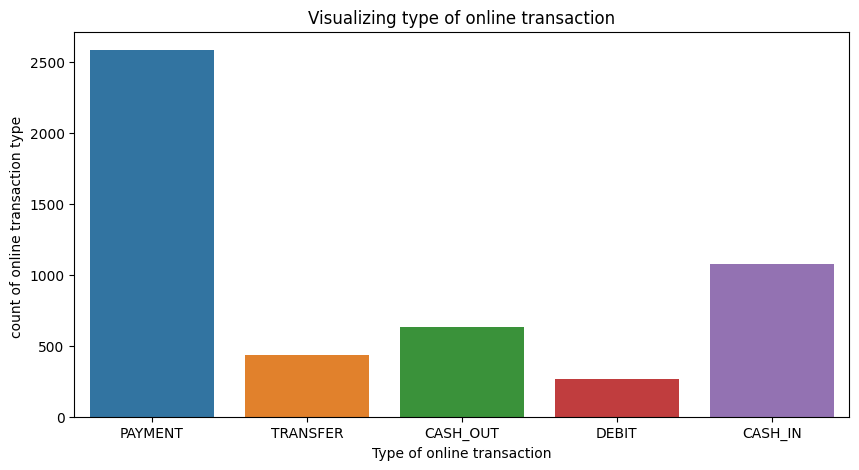

In [146]:
# Univariate Analysis
#visualize type of online transaction
plt.figure(figsize=(10,5))
sns.countplot (x="type", data= dt)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

<Axes: title={'center': 'Fraudulent Transactions'}, ylabel='count'>

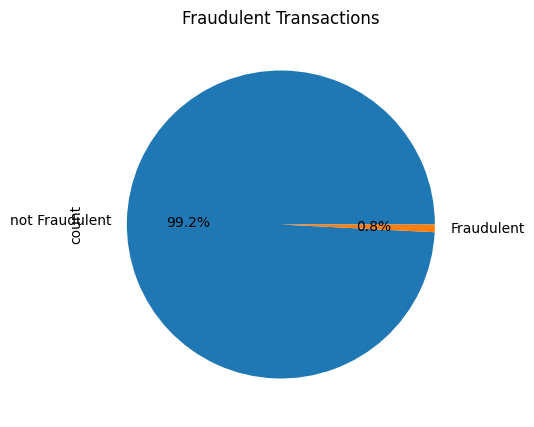

In [147]:
def Fraud (x):
    if x ==1:
        return "Fraudulent"
    else:
        return "not Fraudulent"
    
# create a new column
dt["fraud_transaction_label"] = dt["fraud_transaction"].apply(Fraud)


# create visualization
plt.figure(figsize = (10,5))
plt.title ("Fraudulent Transactions")
dt.fraud_transaction_label.value_counts().plot.pie(autopct='%1.1f%%')

In [148]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='amount', ylabel='Count'>

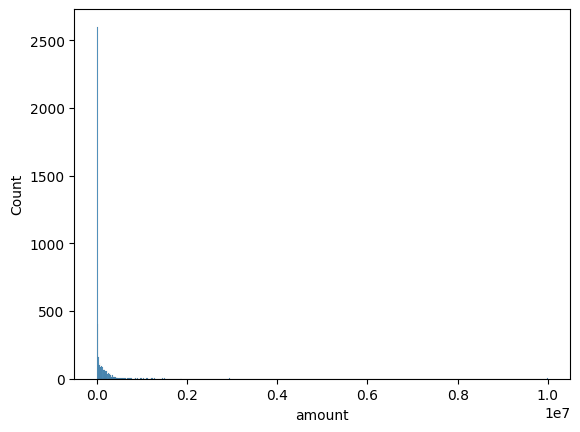

In [149]:
sns.histplot(x= "amount", data =dt)

<Axes: xlabel='type', ylabel='amount'>

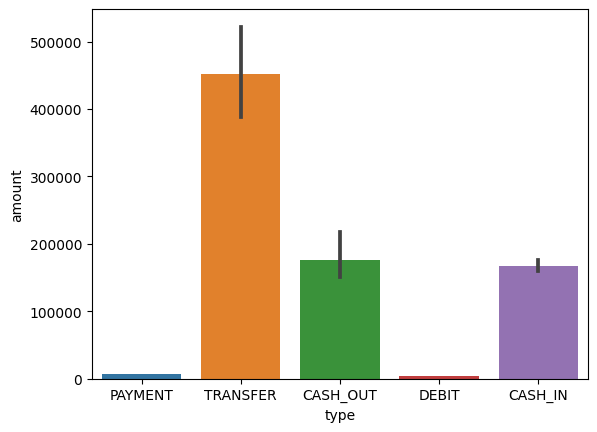

In [150]:
# Bivariate Analysis

sns.barplot(x='type',y='amount',data=dt)

Text(0, 0.5, 'fraud_transaction_label')

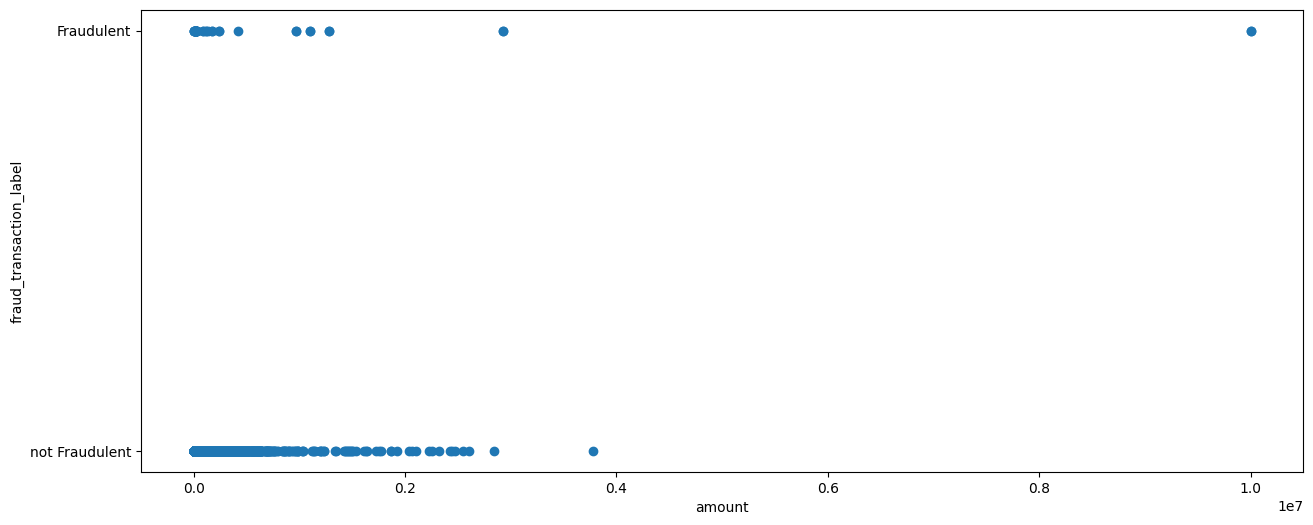

In [151]:
# Visualization between amount and fraud_transaction_label

plt.figure(figsize=(15,6))
plt.scatter(x='amount',y='fraud_transaction_label',data=dt)
plt.xlabel('amount')
plt.ylabel('fraud_transaction_label')

Text(0, 0.5, 'fraud_transaction_label')

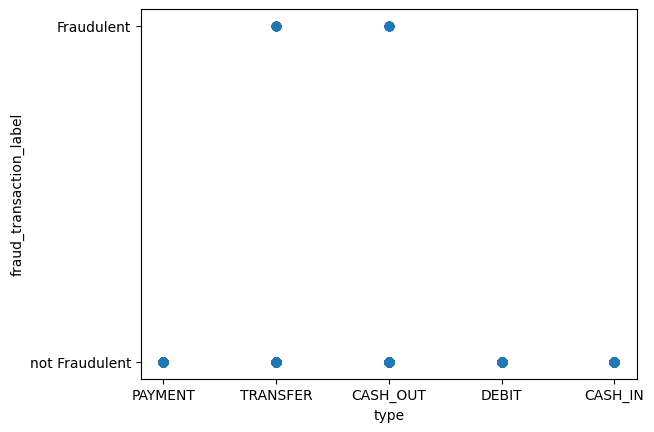

In [152]:
plt.scatter(x='type',y='fraud_transaction_label',data=dt)
plt.xlabel('type')
plt.ylabel('fraud_transaction_label')

# Feature engineering 

In [153]:
categorical = ['type']

In [154]:
categories_dummies = pd.get_dummies(dt[categorical])

#view what you have done
categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,False,False,True,False


In [155]:
dt= pd.concat([dt,categories_dummies], axis=1)
print(dt.shape)
dt.head()       

(4999, 16)


,step,type,amount,customer_starting_transaction,bal_before_transaction,bal_after_transaction,recipient_of_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,fraud_transaction_label,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,not Fraudulent,False,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,not Fraudulent,False,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraudulent,False,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraudulent,False,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,not Fraudulent,False,False,False,True,False


In [156]:
dt.drop('type',inplace=True,axis=1)




In [157]:
dt.drop(columns=['fraud_transaction_label', 'customer_starting_transaction', 'recipient_of_transaction'], inplace=True)

In [158]:
dt.head()

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,False,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,False,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,False,True,False


# Model selection and training

In [159]:
y=dt.fraud_transaction	


In [160]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [161]:
x = dt.drop(['fraud_transaction'], axis = 1)

In [162]:
x

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,0.00,0.00,False,False,False,True,False
2,1,181.00,181.00,0.00,0.00,0.00,False,False,False,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4994,5,185680.98,3756863.21,3942544.19,1774746.94,1589065.96,True,False,False,False,False
4995,5,67017.13,3942544.19,4009561.32,118844.67,51827.53,True,False,False,False,False
4996,5,122744.28,4009561.32,4132305.60,207106.34,84362.06,True,False,False,False,False
4997,5,414729.24,4132305.60,4547034.84,2109808.94,1695079.69,True,False,False,False,False


In [163]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [164]:
LR = LogisticRegression(random_state=42)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)

In [165]:
models = [LR,KN,DC,RF]

In [166]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [167]:
from sklearn.metrics import confusion_matrix

In [168]:

def trainer(model,X_train,y_train,X_test,y_test):
    
    model.fit(X_train,y_train)
    
    prediction = model.predict(X_test)
    
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test, prediction))
    plot_confusion_matrix(y_test,prediction) 


For LogisticRegression, Accuracy score is 0.986 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       989
           1       0.43      0.82      0.56        11

    accuracy                           0.99      1000
   macro avg       0.71      0.90      0.78      1000
weighted avg       0.99      0.99      0.99      1000



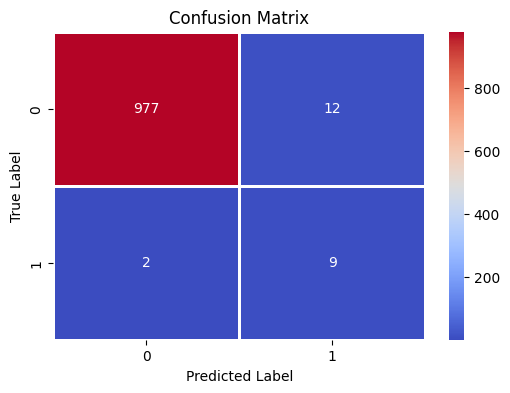


For KNeighborsClassifier, Accuracy score is 0.99 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       989
           1       1.00      0.09      0.17        11

    accuracy                           0.99      1000
   macro avg       0.99      0.55      0.58      1000
weighted avg       0.99      0.99      0.99      1000



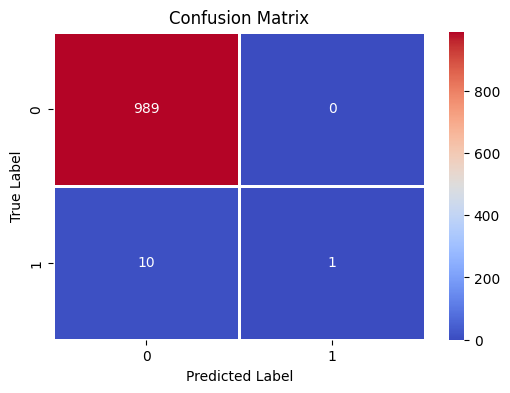


For DecisionTreeClassifier, Accuracy score is 0.992 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       989
           1       0.62      0.73      0.67        11

    accuracy                           0.99      1000
   macro avg       0.81      0.86      0.83      1000
weighted avg       0.99      0.99      0.99      1000



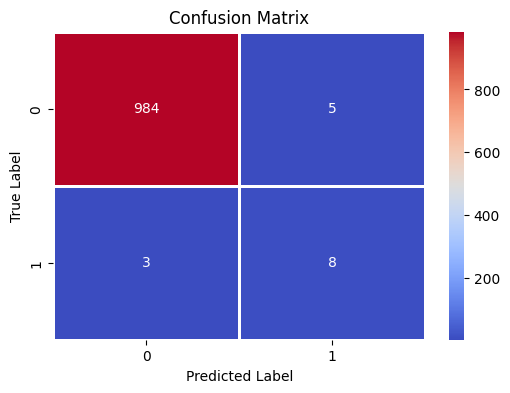


For RandomForestClassifier, Accuracy score is 0.994 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       989
           1       1.00      0.45      0.62        11

    accuracy                           0.99      1000
   macro avg       1.00      0.73      0.81      1000
weighted avg       0.99      0.99      0.99      1000



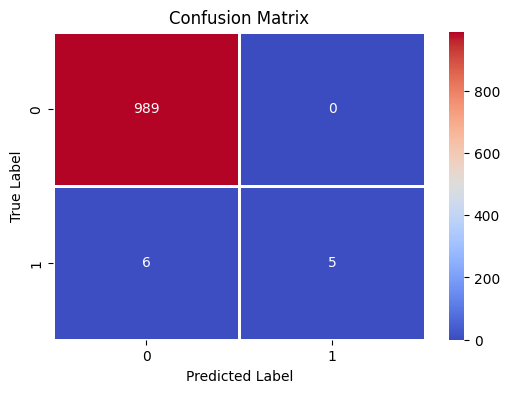

In [169]:
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)
    

In [170]:

from sklearn.model_selection import cross_validate


DC_scores = cross_validate(DC, X_test, y_test, scoring='recall_macro')
RF_scores = cross_validate(RF, X_test, y_test, scoring='recall_macro')


print('Decision Tree Recall Cross-Validation:', np.mean(DC_scores['test_score']))
print('Random Forest Recall Cross-Validation:', np.mean(RF_scores['test_score']))

Decision Tree Recall Cross-Validation: 0.8318156181100343
Random Forest Recall Cross-Validation: 0.6


In [172]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np


param_grid_dc = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dc = DecisionTreeClassifier()
rf = RandomForestClassifier()


grid_search_dc = GridSearchCV(estimator=dc, param_grid=param_grid_dc, scoring='recall_macro', cv=5)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='recall_macro', cv=5)


grid_search_dc.fit(X_test, y_test)
grid_search_rf.fit(X_test, y_test)


best_dc = grid_search_dc.best_estimator_
best_rf = grid_search_rf.best_estimator_


DC_scores = cross_validate(best_dc, X_test, y_test, scoring='recall_macro', cv=5)
RF_scores = cross_validate(best_rf, X_test, y_test, scoring='recall_macro', cv=5)


print('Decision Tree Recall Cross-Validation:', np.mean(DC_scores['test_score']))
print('Random Forest Recall Cross-Validation:', np.mean(RF_scores['test_score']))


KeyboardInterrupt: 